## Student Grading Model

This is Supervised Machine Learning projet to predict the Student performance based on the historical data whether they have passed the examination based on the marks. This will be example of Regression type Machine Learning.


The link to the data source can be found here - https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [1]:
file = open("data/student.txt","r")
print(file.read())

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

#### Declare Necessary packages required for Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the data from the dataset

Since the data is not correctly loaded into the pandas, it should be corrected to map with columns. If you look carefully, the columns are delimited or separated with the ";". Hence we will use delimited as colon to load the data and verify the results.

In [3]:
data = pd.read_csv('data/student-por.csv',delimiter=";")
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


### Reading the file

### Check for the Blank values:
Let's perform the data operations to find, if there are blank values
If none found, check for transformation or one-hot encoding

In [4]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [86]:
new_data = data.drop(['school'],axis=1)
new_data
for x in new_data:
    print(new_data[x].describe())


count     649
unique      2
top         F
freq      383
Name: sex, dtype: object
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
count     649
unique      2
top         U
freq      452
Name: address, dtype: object
count     649
unique      2
top       GT3
freq      457
Name: famsize, dtype: object
count     649
unique      2
top         T
freq      569
Name: Pstatus, dtype: object
count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
count       649
unique        5
top       other
freq        258
Name: Mjob, dtype: object
count       64

### Perform OneHotEncoding to transform the Values

In [5]:
data['school_en'] = data['school'].map({'GP':0,'MS':1})
data['sex_en'] = data['sex'].map({'F':0,'M':1})
data['famsize_en'] = data['famsize'].map({'GT3':0,'LE3':1})
data['address_en'] = data['address'].map({'U':0,'R':1})
data['Pstatus_en'] = data['Pstatus'].map({'T':0,'A':1})
data['schoolsup_en'] = data['schoolsup'].map({'yes':0,'no':1})
data['famsup_en'] = data['famsup'].map({'yes':0,'no':1})
data['paid_en'] = data['paid'].map({'yes':0,'no':1})

### Drop the Un-necessary columns

In [6]:
# Separate features and labels
y = data['G3']
x = data
X  = x.drop(['G3','school','sex','famsize','address','Pstatus','Fjob','Mjob','reason','guardian','activities','schoolsup','famsup','paid','internet','nursery','higher','romantic'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 519 rows
Test Set: 130 rows


### Implement Linear Regression

In [8]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [9]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:5])
print('Actual labels   : ' ,y_test[:5])

Predicted labels:  [ 7. 15. 17. 10.  9.]
Actual labels   :  532     8
375    15
306    16
625    10
480    10
Name: G3, dtype: int64


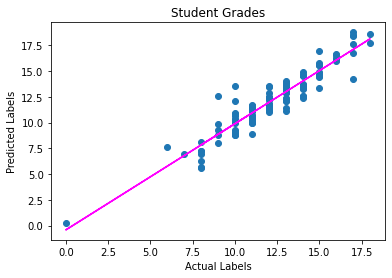

In [10]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Student Grades')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.9938540257878292
RMSE: 0.9969222767035699
R2: 0.8600975125290339


### Implement Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_14 <= 11.50
|   |--- feature_14 <= 7.50
|   |   |--- feature_12 <= 1.00
|   |   |   |--- feature_0 <= 17.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- feature_9 <= 1.50
|   |   |   |   |   |   |--- value: [8.00]
|   |   |   |   |   |--- feature_9 >  1.50
|   |   |   |   |   |   |--- value: [7.00]
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  17.50
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_12 >  1.00
|   |   |   |--- feature_13 <= 8.50
|   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |   |--- feature_13 <= 7.50
|   |   |   |   |   |   |   |--- value: [7.00]
|   |   |   |   |   |   |--- feature_13 >  7.50
|   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [7.00]
|   |   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |   |--- value

### Identify the Importance of the Features

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
rfc.feature_importances_

array([0.05333255, 0.04382599, 0.04525103, 0.03010847, 0.03777218,
       0.02094361, 0.03846559, 0.04734317, 0.0501143 , 0.02724394,
       0.04374365, 0.04958089, 0.06768881, 0.12155107, 0.18568492,
       0.02007096, 0.02105956, 0.02098767, 0.02035474, 0.01165569,
       0.01285159, 0.02260187, 0.00776775])

In [14]:
v = 0
for i in X_test.columns:
    print(i,"-",rfc.feature_importances_[v])
    v = v + 1

age - 0.05333255218872816
Medu - 0.043825987495988435
Fedu - 0.0452510277854807
traveltime - 0.03010846699991178
studytime - 0.0377721848936427
failures - 0.020943613139996802
famrel - 0.03846558830238073
freetime - 0.047343174795496636
goout - 0.05011429927615806
Dalc - 0.027243942053804978
Walc - 0.04374365372380206
health - 0.04958088576160141
absences - 0.06768880553743711
G1 - 0.12155106898756728
G2 - 0.1856849207265295
school_en - 0.0200709612289645
sex_en - 0.02105955600194515
famsize_en - 0.020987672679888148
address_en - 0.020354738605342128
Pstatus_en - 0.011655691730309036
schoolsup_en - 0.012851589573256036
famsup_en - 0.02260187319302732
paid_en - 0.00776774531874143


### The End